Random Forest Regression with Particle Swarm Optimization (RFR-PSO) using Random Initialization

In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from pyswarm import pso
from sklearn.metrics import r2_score

# Load the data
df = pd.read_csv('/Users/emirtuna/Desktop/aliminium_v2.csv')

# Separate the input features (parameters) and the target variable (temperature)
X = df.iloc[:, :-1]  # Input features (parameters)
y = df.iloc[:, -1]  # Target variable

# Rename the columns in X to match the feature names
X.columns = ['Y-Bound', 'Cell Size', 'XY-Period', 'Z-P-Start', 'Z-P-End', 't-base_min', 'Heigh-min_t', 't-base_max',
             'Height-max_t', 'radial-ramp_start-t', 'Start-radius_t-ramp', 'Radial-ramp_end-t', 'End-radius_t-ramp']

# Train a RandomForestRegressor model
model = RandomForestRegressor()
model.fit(X, y)

# Define the objective function that we want to minimize
def objective_function(x):
    x = pd.DataFrame([x], columns=X.columns)  # Create a DataFrame from x with the correct column names
    return model.predict(x)

# Define the bounds for each input feature
lb = [df[column].min() for column in X.columns]
ub = [df[column].max() for column in X.columns]

# Set maximum iteration number and swarm size
max_iter =1500
swarm_size = 500
num_initializations = 1 # Number of initializations to try

# Initialize lists to store results from different runs
optimal_solutions = []
optimal_objective_values = []

# Run the PSO algorithm with multiple initializations
for _ in range(num_initializations):
    # Randomly initialize the swarm
    initial_swarm = np.random.uniform(lb, ub, size=(swarm_size, len(X.columns)))
    
    # Run PSO
    xopt, fopt = pso(objective_function, lb, ub, swarmsize=swarm_size, maxiter=max_iter)
    
    # Store the results
    optimal_solutions.append(xopt)
    optimal_objective_values.append(fopt)

# Find the best solution among the runs (lowest objective value)
best_index = np.argmin(optimal_objective_values)
best_solution = optimal_solutions[best_index]
best_objective_value = optimal_objective_values[best_index]

# Print the optimal set of input feature values
print("Optimal set of input feature values:")
print(best_solution)

# Calculate and print the minimum 'Temperature'
print("Minimum 'Temperature':")
print(best_objective_value)

# Calculate R^2 value using the same dataset used for training
y_pred = model.predict(X)  # Predict 'Temperature' for the training dataset
r2 = r2_score(y, y_pred)  # Calculate R^2 value
print("R^2 Value:")
print(r2)


Stopping search: maximum iterations reached --> 1500
Optimal set of input feature values:
[1.09452913e+02 3.00000000e+00 9.00000000e-01 1.00891318e-01
 1.00000000e-01 1.30326381e+00 4.00000000e+01 1.10711589e+00
 8.00000000e+01 5.00000000e-01 7.00000000e+00 9.80301137e+00
 7.29131219e+00]
Minimum 'Temperature':
[310.3699875]
R^2 Value:
0.9843662058641486


RFR-PSO
(Iteration: 1500,
Swarm Size: 500)

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from pyswarm import pso
from sklearn.metrics import r2_score

# Load the data
df = pd.read_csv('/Users/emirtuna/Desktop/aliminium.csv')

# Separate the input features (parameters) and the target variable (temperature)
X = df.iloc[:, :-1]  # Input features (parameters)
y = df.iloc[:, -1]  # Target variable

# Rename the columns in X to match the feature names
X.columns = ['Y-Bound', 'Cell Size', 'XY-Period', 'Z-P-Start', 'Z-P-End', 't-base_min', 'Heigh-min_t', 't-base_max',
             'Height-max_t', 'radial-ramp_start-t', 'Start-radius_t-ramp', 'Radial-ramp_end-t', 'End-radius_t-ramp']

# Train a RandomForestRegressor model
model = RandomForestRegressor()
model.fit(X, y)

# Define the objective function that we want to minimize
def objective_function(x):
    x = pd.DataFrame([x], columns=X.columns)  # Create a DataFrame from x with the correct column names
    return model.predict(x)

# Define the bounds for each input feature
lb = [df[column].min() for column in X.columns]
ub = [df[column].max() for column in X.columns]

# Set maximum iteration number and swarm size
max_iter = 1500
swarm_size = 500

# Run the Particle Swarm Optimization algorithm
xopt, fopt = pso(objective_function, lb, ub, swarmsize=swarm_size, maxiter=max_iter)

# Print the optimal set of input feature values
print("Optimal set of input feature values:")
print(xopt)

# Calculate and print the minimum 'Temperature'
print("Minimum 'Temperature':")
print(fopt)

# Calculate R^2 value using the same dataset used for training
y_pred = model.predict(X)  # Predict 'Temperature' for the training dataset
r2 = r2_score(y, y_pred)  # Calculate R^2 value
print("R^2 Value:")
print(r2)


Stopping search: maximum iterations reached --> 1500
Optimal set of input feature values:
[109.82727193   3.00002722   0.9          0.15389766   0.3
   1.1359179    0.           1.4         40.00300634   0.5
   6.99972267   8.68794344   8.95797281]
Minimum 'Temperature':
[310.5585]
R^2 Value:
0.9801997265348844


RFR-PSO R^2 Calculation

Stopping search: maximum iterations reached --> 1500
Parameters:
Kernel Function: Random Forest
Results:
RMSE (Root Mean Squared Error): 0.27013
R-Squared: 0.98
MSE (Mean Squared Error): 0.07297
MAE (Mean Absolute Error): 0.16384


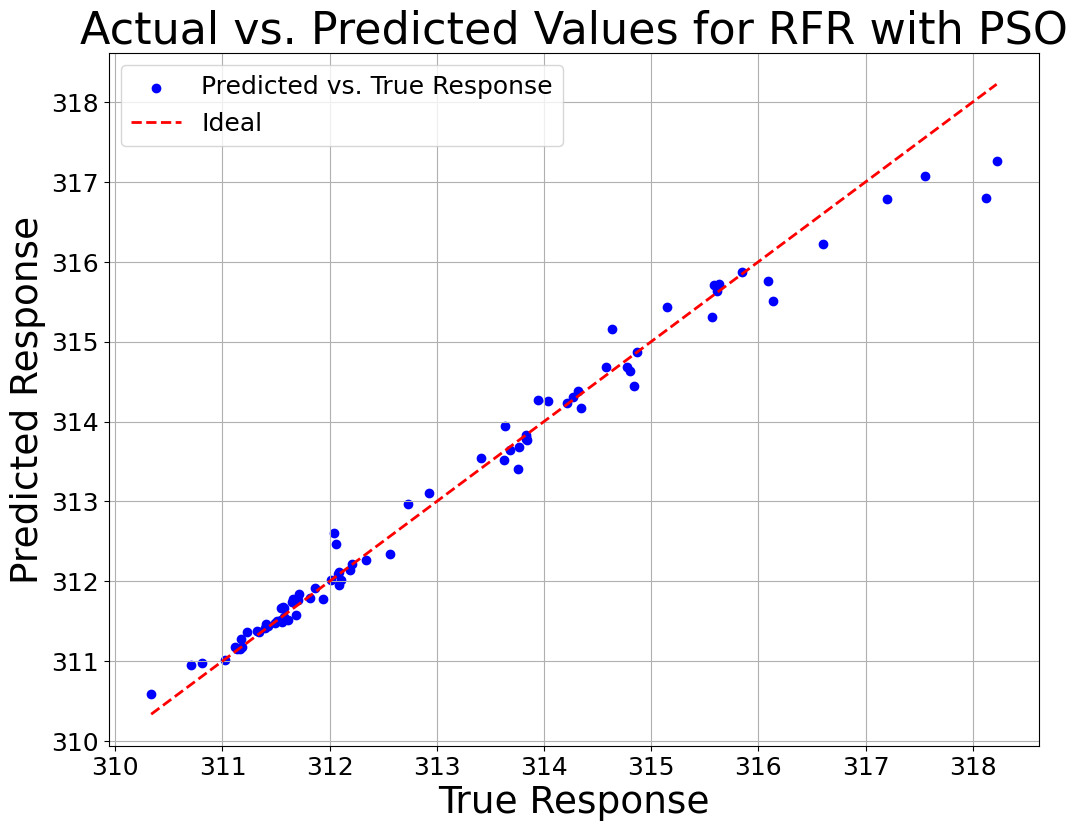

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from pyswarm import pso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/Users/emirtuna/Desktop/aliminium.csv')

# Separate the input features (parameters) and the target variable (temperature)
X = df.iloc[:, :-1]  # Input features (parameters)
y = df.iloc[:, -1]  # Target variable

# Rename the columns in X to match the feature names
X.columns = ['Y-Bound', 'Cell Size', 'XY-Period', 'Z-P-Start', 'Z-P-End', 't-base_min', 'Heigh-min_t', 't-base_max',
             'Height-max_t', 'radial-ramp_start-t', 'Start-radius_t-ramp', 'Radial-ramp_end-t', 'End-radius_t-ramp']

# Train a RandomForestRegressor model
model = RandomForestRegressor()
model.fit(X, y)

# Define the objective function that we want to minimize
def objective_function(x):
    x = pd.DataFrame([x], columns=X.columns)  # Create a DataFrame from x with the correct column names
    return model.predict(x)

# Define the bounds for each input feature
lb = [df[column].min() for column in X.columns]
ub = [df[column].max() for column in X.columns]

# Set maximum iteration number and swarm size
max_iter = 1500
swarm_size = 150

# Run the Particle Swarm Optimization algorithm
xopt, fopt = pso(objective_function, lb, ub, swarmsize=swarm_size, maxiter=max_iter)

# Calculate R^2 value using the same dataset used for training
y_pred = model.predict(X)  # Predict 'Temperature' for the training dataset
r2 = r2_score(y, y_pred)  # Calculate R^2 value

# Calculate RMSE, MSE, and MAE
rmse = np.sqrt(mean_squared_error(y, y_pred))
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)

# Print Parameters
print("Parameters:")
print("Kernel Function: Random Forest")

# Print Results
print("Results:")
print(f"RMSE (Root Mean Squared Error): {rmse:.5f}")
print(f"R-Squared: {r2:.2f}")
print(f"MSE (Mean Squared Error): {mse:.5f}")
print(f"MAE (Mean Absolute Error): {mae:.5f}")

# Plot predicted response vs. true response
plt.figure(figsize=(12, 9))
plt.scatter(y, y_pred, c='blue', label='Predicted vs. True Response')
plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='red', linewidth=2, label='Ideal')
plt.xlabel('True Response', fontsize = 27)
plt.ylabel('Predicted Response', fontsize = 27)
plt.title('Actual vs. Predicted Values for RFR with PSO', fontsize = 32)
plt.legend(fontsize = 18)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.grid(True)
plt.show()


RFR-PSO Taguchi-AI

Stopping search: maximum iterations reached --> 1500
R2 Score: 0.9827
Taguchi: 
Average (K) = 313.104725 
Minimum (K) = 310.335 
SVM: 
Average (K) = 310.3326666666666 
Minimum (K) = 310.202 
RFR: 
Average (K) = 310.61571428571426 
Minimum (K) = 310.287


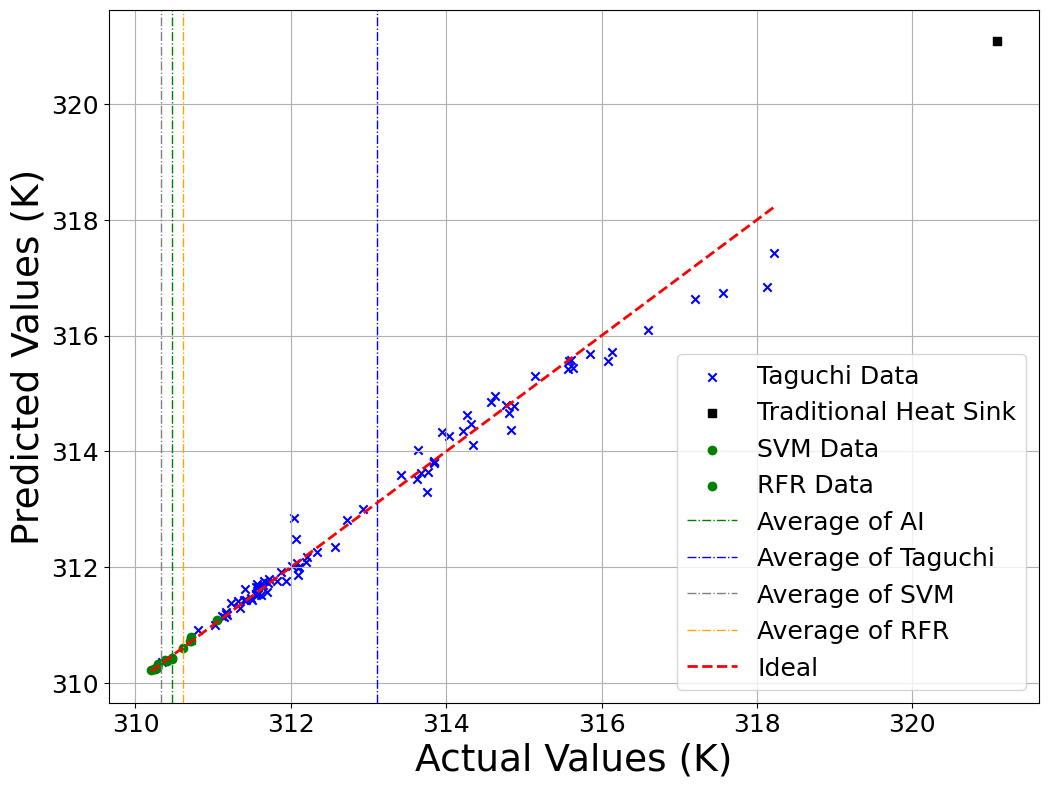

,Y-Bound,Cell Size,XY-Period,Z-P-Start,Z-P-End,t-base_min,Heigh-min_t,t-base_max,Height-max_t,radial-ramp_start-t,Start-radius_t-ramp,Radial-ramp_end-t,End-radius_t-ramp,Temperature,TAI
0,90.0,3.0,0.1,0.1,0.1,1.0,0.0,1.0,40.0,0.5,3.0,5.0,7.0,314.867,1
1,100.0,3.0,0.5,0.3,0.3,1.0,20.0,1.4,60.0,0.8,7.0,5.0,7.0,312.062,1
2,100.0,3.0,0.5,0.3,0.1,1.2,40.0,1.0,80.0,1.2,3.0,15.0,9.5,312.727,1
3,90.0,3.0,0.1,0.1,0.2,1.2,20.0,1.2,60.0,0.8,5.0,15.0,9.5,314.631,1
4,110.0,3.0,0.9,0.2,0.3,1.2,0.0,1.4,40.0,0.5,7.0,15.0,9.5,310.335,1


In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from pyswarm import pso
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/Users/emirtuna/Desktop/aliminium_v22.csv')


# Convert specific columns to float data type
numeric_cols = ['Y-Bound', 'Cell Size', 'XY-Period', 'Z-P-Start', 'Z-P-End', 't-base_min',
                'Heigh-min_t', 't-base_max', 'Height-max_t', 'radial-ramp_start-t',
                'Start-radius_t-ramp', 'Radial-ramp_end-t', 'End-radius_t-ramp']
data[numeric_cols] = data[numeric_cols].astype(float)

# Define the input features (X) and the target variable (y)
X = data.drop('Temperature', axis=1)
y = data['Temperature']

# Train a RandomForestRegressor model
model = RandomForestRegressor()
model.fit(X, y)

# Define the objective function that we want to minimize
def objective_function(x):
    x = pd.DataFrame([x], columns=X.columns)  # Create a DataFrame from x with the correct column names
    return model.predict(x)

# Define the bounds for each input feature
lb = [data[column].min() for column in X.columns]
ub = [data[column].max() for column in X.columns]

# Set maximum iteration number and swarm size
max_iter = 1500
swarm_size = 150

# Run the Particle Swarm Optimization algorithm
xopt, fopt = pso(objective_function, lb, ub, swarmsize=swarm_size, maxiter=max_iter)

# Calculate R^2 value using the same dataset used for training
y_pred = model.predict(X)  # Predict 'Temperature' for the training dataset

# Calculate the R2 score
r2 = r2_score(y, y_pred)

print(f'R2 Score: {r2:.4f}')

# Create a plot of predicted vs. actual values
plt.figure(figsize=(12, 9))

# Plot Taguchi data points with 'x' in blue
taguchi_data = data[data['TAI'] == 1]

plt.scatter(taguchi_data['Temperature'], y_pred[taguchi_data.index], c='blue', marker='x', label='Taguchi Data')
taguchi_avg = taguchi_data['Temperature'].mean()
plt.scatter(321.084, 321.084, c='black', marker='s', label='Traditional Heat Sink')

# Plot AI data points with 'o' in green
svm_data = data[data['TAI'] == 0]
plt.scatter(svm_data['Temperature'], y_pred[svm_data.index], c='green', marker='o', label='SVM Data')
svm_avg = svm_data['Temperature'].mean()

rfr_data = data[data['TAI'] == 2]
plt.scatter(rfr_data['Temperature'], y_pred[rfr_data.index], c='green', marker='o', label='RFR Data')
rfr_avg = rfr_data['Temperature'].mean()

ai_avg =(rfr_avg + svm_avg) / 2

svm_min = svm_data['Temperature'].min()
rfr_min = rfr_data['Temperature'].min()
taguchi_min = taguchi_data['Temperature'].min()


print('Taguchi:', '\nAverage (K) =', taguchi_avg, '\nMinimum (K) =', taguchi_min, '\nSVM:', '\nAverage (K) =', svm_avg, '\nMinimum (K) =', svm_min, '\nRFR:', '\nAverage (K) =', rfr_avg, '\nMinimum (K) =', rfr_min)


plt.axvline(x=ai_avg,  linestyle='-.', color ='green', linewidth=1, label='Average of AI')
plt.axvline(x=taguchi_avg, linestyle='-.', color ='blue', linewidth=1, label='Average of Taguchi')
plt.axvline(x=svm_avg,  linestyle='-.', color ='grey', linewidth=1, label='Average of SVM')
plt.axvline(x=rfr_avg, linestyle='-.', color ='orange', linewidth=1, label='Average of RFR')

plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='red', linewidth=2, label='Ideal')
plt.xlabel('Actual Values (K)', fontsize=27)
plt.ylabel('Predicted Values (K)', fontsize=27)
#plt.title('Actual vs. Predicted Values for SVM', fontsize=32) #(SVM with RBF Kernel)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.legend(fontsize = 18)
plt.grid(True)
plt.show()
data.head()

RFR-PSO R^2 with Test-Train Seperated

RFR-PSO with Annealing

In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from pyswarm import pso
from scipy.optimize import minimize
from sklearn.metrics import r2_score

# Load the data
df = pd.read_csv('/Users/emirtuna/Desktop/aliminium.csv')

# Separate the input features (parameters) and the target variable (temperature)
X = df.iloc[:, :-1]  # Input features (parameters)
y = df.iloc[:, -1]  # Target variable

# Rename the columns in X to match the feature names
X.columns = ['Y-Bound', 'Cell Size', 'XY-Period', 'Z-P-Start', 'Z-P-End', 't-base_min', 'Heigh-min_t', 't-base_max',
             'Height-max_t', 'radial-ramp_start-t', 'Start-radius_t-ramp', 'Radial-ramp_end-t', 'End-radius_t-ramp']

# Train a RandomForestRegressor model
model = RandomForestRegressor()
model.fit(X, y)

# Define the objective function that we want to minimize
def objective_function(x):
    x = pd.DataFrame([x], columns=X.columns)  # Create a DataFrame from x with the correct column names
    return model.predict(x)

# Define the bounds for each input feature
lb = [df[column].min() for column in X.columns]
ub = [df[column].max() for column in X.columns]

# Set maximum iteration number and swarm size for PSO
pso_max_iter = 1500
pso_swarm_size = 150

# Run the Particle Swarm Optimization algorithm (PSO) to explore the search space
xopt_pso, fopt_pso = pso(objective_function, lb, ub, swarmsize=pso_swarm_size, maxiter=pso_max_iter)

# Define a function for Simulated Annealing
def simulated_annealing(x0, obj_func, bounds, max_iter):
    result = minimize(obj_func, x0, bounds=bounds, method='L-BFGS-B', options={'maxiter': max_iter})
    return result.x, result.fun

# Set the initial solution from PSO as the starting point for Simulated Annealing
initial_solution = xopt_pso

# Define bounds for Simulated Annealing as a list of tuples
sa_bounds = [(lb_i, ub_i) for lb_i, ub_i in zip(lb, ub)]

# Run Simulated Annealing to refine the solution
sa_max_iter = 2500  # Adjust as needed
xopt_sa, fopt_sa = simulated_annealing(initial_solution, objective_function, sa_bounds, max_iter=sa_max_iter)

# Compare the results of PSO and Simulated Annealing
if fopt_sa < fopt_pso:
    xopt = xopt_sa
    fopt = fopt_sa
else:
    xopt = xopt_pso
    fopt = fopt_pso

# Print the optimal set of input feature values
print("Optimal set of input feature values:")
print(xopt)

# Calculate and print the minimum 'Temperature'
print("Minimum 'Temperature':")
print(fopt)

# Calculate R^2 value using the same dataset used for training
y_pred = model.predict(X)  # Predict 'Temperature' for the training dataset
r2 = r2_score(y, y_pred)  # Calculate R^2 value
print("R^2 Value:")
print(r2)


Stopping search: maximum iterations reached --> 1500
Optimal set of input feature values:
[109.4918298    3.           0.9          0.23691462   0.25388718
   1.20310492  27.97148769   1.12746637  40.           0.5
   3.07428494  15.25554422   7.20733549]
Minimum 'Temperature':
[310.72648]
R^2 Value:
0.9806252139693308


RFR with Optimized Hyper Parameters 

In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Load the data
df = pd.read_csv('/Users/emirtuna/Desktop/aliminium.csv')

# Separate the input features (parameters) and the target variable (temperature)
X = df.iloc[:, :-1]  # Input features (parameters)
y = df.iloc[:, -1]  # Target variable

# Rename the columns in X to match the feature names
X.columns = ['Y-Bound', 'Cell Size', 'XY-Period', 'Z-P-Start', 'Z-P-End', 't-base_min', 'Heigh-min_t', 't-base_max',
             'Height-max_t', 'radial-ramp_start-t', 'Start-radius_t-ramp', 'Radial-ramp_end-t', 'End-radius_t-ramp']

# Define the best hyperparameters
best_hyperparameters = {
    'n_estimators': 100,
    'max_depth': 30,
    'min_samples_split': 5,
    'min_samples_leaf': 1
}

# Create a RandomForestRegressor model with the best hyperparameters
best_model = RandomForestRegressor(
    n_estimators=best_hyperparameters['n_estimators'],
    max_depth=best_hyperparameters['max_depth'],
    min_samples_split=best_hyperparameters['min_samples_split'],
    min_samples_leaf=best_hyperparameters['min_samples_leaf']
)

# Fit the best model on the entire dataset
best_model.fit(X, y)

# Predict the 'Temperature' using the best model
y_pred = best_model.predict(X)

# Find the row with the minimum 'Temperature' value
min_temperature_index = np.argmin(y_pred)
min_temperature_value = y_pred[min_temperature_index]
best_parameters = X.iloc[min_temperature_index]

# Calculate and print the minimum 'Temperature'
mse = mean_squared_error(y, y_pred)
print("Minimum 'Temperature':")
print(min_temperature_value)

# Print the input parameters for the best achieved temperature result
print("Input parameters for the best achieved temperature result:")
print(best_parameters)

# Calculate R^2 value using the same dataset used for training
r2 = r2_score(y, y_pred)
print("R^2 Value:")
print(r2)


Minimum 'Temperature':
310.6355809007932
Input parameters for the best achieved temperature result:
Y-Bound                110.0
Cell Size                3.0
XY-Period                0.9
Z-P-Start                0.2
Z-P-End                  0.3
t-base_min               1.2
Heigh-min_t              0.0
t-base_max               1.4
Height-max_t            40.0
radial-ramp_start-t      0.5
Start-radius_t-ramp      7.0
Radial-ramp_end-t       15.0
End-radius_t-ramp        9.5
Name: 4, dtype: float64
R^2 Value:
0.96828996362236


RFR-PSO with Annealing

In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from pyswarm import pso
from scipy.optimize import minimize
from sklearn.metrics import r2_score

# Load the data
df = pd.read_csv('/Users/emirtuna/Desktop/aliminium.csv')

# Separate the input features (parameters) and the target variable (temperature)
X = df.iloc[:, :-1]  # Input features (parameters)
y = df.iloc[:, -1]  # Target variable

# Rename the columns in X to match the feature names
X.columns = ['Y-Bound', 'Cell Size', 'XY-Period', 'Z-P-Start', 'Z-P-End', 't-base_min', 'Heigh-min_t', 't-base_max',
             'Height-max_t', 'radial-ramp_start-t', 'Start-radius_t-ramp', 'Radial-ramp_end-t', 'End-radius_t-ramp']

# Define the best hyperparameters
best_hyperparameters = {
    'n_estimators': 100,
    'max_depth': 30,
    'min_samples_split': 5,
    'min_samples_leaf': 1
}

# Train a RandomForestRegressor model with the best hyperparameters
model = RandomForestRegressor(n_estimators=best_hyperparameters['n_estimators'],
                              max_depth=best_hyperparameters['max_depth'],
                              min_samples_split=best_hyperparameters['min_samples_split'],
                              min_samples_leaf=best_hyperparameters['min_samples_leaf'])

model.fit(X, y)

# Define the objective function that we want to minimize
def objective_function(x):
    x = pd.DataFrame([x], columns=X.columns)  # Create a DataFrame from x with the correct column names
    return model.predict(x)

# Define the bounds for each input feature
lb = [df[column].min() for column in X.columns]
ub = [df[column].max() for column in X.columns]

# Set maximum iteration number and swarm size for PSO
pso_max_iter = 1500
pso_swarm_size = 150

# Run the Particle Swarm Optimization algorithm (PSO) to explore the search space
xopt_pso, fopt_pso = pso(objective_function, lb, ub, swarmsize=pso_swarm_size, maxiter=pso_max_iter)

# Define a function for Simulated Annealing
def simulated_annealing(x0, obj_func, bounds, max_iter):
    result = minimize(obj_func, x0, bounds=bounds, method='L-BFGS-B', options={'maxiter': max_iter})
    return result.x, result.fun

# Set the initial solution from PSO as the starting point for Simulated Annealing
initial_solution = xopt_pso

# Define bounds for Simulated Annealing as a list of tuples
sa_bounds = [(lb_i, ub_i) for lb_i, ub_i in zip(lb, ub)]

# Run Simulated Annealing to refine the solution
sa_max_iter = 2500  # Adjust as needed
xopt_sa, fopt_sa = simulated_annealing(initial_solution, objective_function, sa_bounds, max_iter=sa_max_iter)

# Compare the results of PSO and Simulated Annealing
if fopt_sa < fopt_pso:
    xopt = xopt_sa
    fopt = fopt_sa
else:
    xopt = xopt_pso
    fopt = fopt_pso

# Print the optimal set of input feature values
print("Optimal set of input feature values:")
print(xopt)

# Calculate and print the minimum 'Temperature'
print("Minimum 'Temperature':")
print(fopt)

# Calculate R^2 value using the same dataset used for training
y_pred = model.predict(X)  # Predict 'Temperature' for the training dataset
r2 = r2_score(y, y_pred)  # Calculate R^2 value
print("R^2 Value:")
print(r2)


Stopping search: maximum iterations reached --> 1500
Optimal set of input feature values:
[102.56239384   3.           0.9          0.20275448   0.20274416
   1.07500929  30.93475132   1.39944277  40.60424567   0.89043017
   6.97873968   6.73135962   9.4482305 ]
Minimum 'Temperature':
[310.78013458]
R^2 Value:
0.9657894003888355
